<a href="https://colab.research.google.com/github/attiqrafiq/Py_AIP/blob/master/Inflam_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading in the dataset

In [ ]:
url = 'https://raw.githubusercontent.com/attiqrafiq/Py_AIP/master/FVsNew1.csv'

In [ ]:
#url = 'features/FVsNew1.csv'
dataset = pd.read_csv(url)

In [ ]:
#spliting data into train and test 
# Creating a dataframe with 80% 
# values of original dataframe 
seed = 6
train = dataset.sample(frac = 0.80, random_state = seed)
# Creating dataframe with  
# rest of the 20% values 
test = dataset.drop(train.index) 

In [ ]:
print(len(train), train.shape)

4018 (4018, 154)


In [ ]:
print(len(test), test.shape)

1004 (1004, 154)


In [ ]:
# View the training data
train.head()

F1     F2      F3      F4     F5  ...  F150  F151  F152  F153   L1
2112  120.0  276.0   730.0  2112.0  298.0  ...  13.0   0.0   0.0   0.0  1.0
2941   61.0  160.0   504.0  1750.0  109.0  ...   0.0   0.0   0.0   0.0  0.0
1409  143.0  314.0   820.0  2414.0  348.0  ...   2.0   0.0   9.0   0.0  1.0
1746  106.0  248.0   670.0  2036.0  257.0  ...  10.0   0.0   6.0   0.0  1.0
4623  163.0  435.0  1363.0  4641.0  393.0  ...   0.0  12.0   0.0   0.0  0.0

[5 rows x 154 columns]

In [ ]:
# View the test data
test.head()

F1     F2      F3       F4     F5  ...  F150  F151  F152  F153   L1
9   239.0  703.0  2569.0  10555.0  607.0  ...   4.0   0.0  25.0   0.0  1.0
13  181.0  447.0  1325.0   4395.0  480.0  ...   3.0   0.0  12.0   0.0  1.0
17  160.0  423.0  1263.0   4095.0  464.0  ...   4.0   0.0  11.0   0.0  1.0
19  176.0  494.0  1758.0   7088.0  496.0  ...   3.0   5.0  10.0   0.0  1.0
23  204.0  622.0  2308.0   9550.0  474.0  ...  33.0   0.0   0.0   0.0  1.0

[5 rows x 154 columns]

In [ ]:
print(train.groupby('L1').size())

L1
0.0    2097
1.0    1921
dtype: int64


In [ ]:
print(test.groupby('L1').size())

L1
0.0    523
1.0    481
dtype: int64


### Split the train & test dataset into their feature set and actual labels

In [ ]:
# View the test data (same columns as the training data)
X_train = train.drop(labels = ["L1"],axis = 1)
y_train = train.L1 

In [ ]:
print(X_train.shape, y_train.shape)

(4018, 153) (4018,)


In [ ]:
y_train.dtypes

dtype('float64')

In [ ]:
y_train = y_train.astype('int64')

In [ ]:
y_train.dtypes

dtype('int64')

In [ ]:
# View the test data (same columns as the training data)
x_test = test.drop(labels = ["L1"],axis = 1)
y_test = test.L1 

In [ ]:
print(x_test.shape, y_test.shape)

(1004, 153) (1004,)


In [ ]:
y_test.dtypes

dtype('float64')

In [ ]:
y_train = y_train.astype('int64')

In [ ]:
y_train.dtypes

dtype('int64')

In [ ]:
y_train.shape

(4018,)

### Scaling of Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[0.21890547, 0.13329348, 0.07385088, ..., 0.        , 0.        ,
        0.        ],
       [0.0721393 , 0.06395696, 0.0471464 , ..., 0.        , 0.        ,
        0.        ],
       [0.2761194 , 0.15600717, 0.08448541, ..., 0.        , 0.09090909,
        0.        ],
       ...,
       [0.49502488, 0.35684399, 0.25983694, ..., 0.        , 0.27272727,
        0.        ],
       [0.2761194 , 0.14046623, 0.07243294, ..., 0.        , 0.        ,
        0.        ],
       [0.24626866, 0.16616856, 0.10374572, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
x_test = scaler.fit_transform(x_test)

In [ ]:
x_test

array([[0.50859951, 0.44686649, 0.34878835, ..., 0.        , 0.25252525,
        0.        ],
       [0.36609337, 0.27247956, 0.17453425, ..., 0.        , 0.12121212,
        0.        ],
       [0.31449631, 0.25613079, 0.16584956, ..., 0.        , 0.11111111,
        0.        ],
       ...,
       [0.34889435, 0.3140327 , 0.24583275, ..., 0.        , 0.        ,
        0.        ],
       [0.33169533, 0.23569482, 0.15072139, ..., 0.        , 0.        ,
        0.        ],
       [0.31941032, 0.20640327, 0.12060513, ..., 0.        , 0.27272727,
        0.        ]])

## Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return model, train_pred, acc, acc_cv

### Logistic Regression

In [ ]:
# Logistic Regression
start_time = time.time()
model_LR, train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 52.19
Accuracy CV 10-Fold: 52.19
Running Time: 0:00:02.795445


In [ ]:
# k-Nearest Neighbours
start_time = time.time()
model_KNN, train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 64.81
Accuracy CV 10-Fold: 43.63
Running Time: 0:00:03.187608


In [ ]:
# Gaussian Naive Bayes
start_time = time.time()
model_GNB, train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 50.67
Accuracy CV 10-Fold: 50.75
Running Time: 0:00:00.939075


In [ ]:
# Linear SVC
start_time = time.time()
model_LSVM, train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 49.25
Accuracy CV 10-Fold: 49.93
Running Time: 0:00:18.543307


In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
model_SGD, train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 51.14
Accuracy CV 10-Fold: 49.25
Running Time: 0:00:02.058944


In [ ]:
# Decision Tree Classifier
start_time = time.time()
model_DTC, train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 81.78
Accuracy CV 10-Fold: 36.06
Running Time: 0:00:05.755420


In [ ]:
# Gradient Boosting Trees
start_time = time.time()
model_GBT, train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 68.12
Accuracy CV 10-Fold: 51.42
Running Time: 0:01:40.195017


In [ ]:
import catboost
from catboost import CatBoostClassifier, Pool, cv

In [ ]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131])

In [ ]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [ ]:
y_train.head()

2112    1
2941    0
1409    1
1746    1
4623    0
Name: L1, dtype: int64

In [ ]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.018657
0:	learn: 0.6868209	total: 123ms	remaining: 2m 3s
1:	learn: 0.6805635	total: 181ms	remaining: 1m 30s
2:	learn: 0.6744096	total: 238ms	remaining: 1m 19s
3:	learn: 0.6687045	total: 290ms	remaining: 1m 12s
4:	learn: 0.6629342	total: 344ms	remaining: 1m 8s
5:	learn: 0.6581289	total: 404ms	remaining: 1m 6s
6:	learn: 0.6535872	total: 476ms	remaining: 1m 7s
7:	learn: 0.6490922	total: 565ms	remaining: 1m 10s
8:	learn: 0.6454219	total: 624ms	remaining: 1m 8s
9:	learn: 0.6419702	total: 677ms	remaining: 1m 7s
10:	learn: 0.6382415	total: 743ms	remaining: 1m 6s
11:	learn: 0.6345889	total: 796ms	remaining: 1m 5s
12:	learn: 0.6311663	total: 850ms	remaining: 1m 4s
13:	learn: 0.6277144	total: 909ms	remaining: 1m 3s
14:	learn: 0.6246551	total: 965ms	remaining: 1m 3s
15:	learn: 0.6217591	total: 1.02s	remaining: 1m 2s
16:	learn: 0.6202625	total: 1.08s	remaining: 1m 2s
17:	learn: 0.6177175	total: 1.13s	remaining: 1m 1s
18:	learn: 0.6171289	total: 1.19s	remaining: 1m 1s
19:	lea

In [ ]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6878634	test: 0.6844191	best: 0.6844191 (0)	total: 972ms	remaining: 16m 10s
1:	learn: 0.6809946	test: 0.6718886	best: 0.6718886 (1)	total: 1.8s	remaining: 14m 57s
2:	learn: 0.6746019	test: 0.6602224	best: 0.6602224 (2)	total: 2.64s	remaining: 14m 36s
3:	learn: 0.6677501	test: 0.6473344	best: 0.6473344 (3)	total: 3.47s	remaining: 14m 24s
4:	learn: 0.6608023	test: 0.6344122	best: 0.6344122 (4)	total: 4.32s	remaining: 14m 20s
5:	learn: 0.6551183	test: 0.6238640	best: 0.6238640 (5)	total: 5.22s	remaining: 14m 25s
6:	learn: 0.6500302	test: 0.6146048	best: 0.6146048 (6)	total: 6.1s	remaining: 14m 25s
7:	learn: 0.6448604	test: 0.6052677	best: 0.6052677 (7)	total: 6.96s	remaining: 14m 23s
8:	learn: 0.6397616	test: 0.5960812	best: 0.5960812 (8)	total: 7.78s	remaining: 14m 16s
9:	learn: 0.6357278	test: 0.5890723	best: 0.5890723 (9)	total: 8.61s	remaining: 14m 12s
10:	learn: 0.6319488	test: 0.5822488	best: 0.5822488 (10)	total: 9.45s	remaining: 14m 9s
11:	learn: 0.6278153	test: 0.5747

In [ ]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 19.11
Accuracy cross-validation 10-Fold: 74.64
Running Time: 0:17:49.175760


In [ ]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.26277080768199196
Recall: 0.386441957313899
F1: 0.31282134980767945
AUC: 0.07523082788257288


### Deep Neural Network Model

In [ ]:
import tensorflow as tf
tf.__version__
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, LSTM, Dense, Embedding
#from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#import matplotlib.pyplot as plt

### Convert the dataset into tensor object

In [ ]:
# View the test data (same columns as the training data)
X_train_n = train.drop(labels = ["L1"],axis = 1)
y_train_n = train.L1 

In [ ]:
y_train_n = y_train_n.astype('int64')

In [ ]:
# View the test data (same columns as the training data)
x_test_n = test.drop(labels = ["L1"],axis = 1)
y_test_n = test.L1 

In [ ]:
y_test_n = y_test_n.astype('int64')

In [ ]:
x_train_tf = tf.convert_to_tensor(X_train_n, np.float32)
sess=tf.compat.v1.InteractiveSession()
#sess = tf.InteractiveSession()
print(x_train_tf)

tf.Tensor(
[[ 120.  276.  730. ...    0.    0.    0.]
 [  61.  160.  504. ...    0.    0.    0.]
 [ 143.  314.  820. ...    0.    9.    0.]
 ...
 [ 231.  650. 2304. ...    0.   27.    0.]
 [ 143.  288.  718. ...    0.    0.    0.]
 [ 131.  331.  983. ...    0.    0.    0.]], shape=(4018, 153), dtype=float32)


In [ ]:
x_train_tf.shape

TensorShape([4018, 153])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train_tf = scaler.fit_transform(x_train_tf)
print(x_train_tf)

[[0.21890547 0.13329348 0.07385088 ... 0.         0.         0.        ]
 [0.0721393  0.06395696 0.0471464  ... 0.         0.         0.        ]
 [0.2761194  0.15600717 0.08448541 ... 0.         0.09090909 0.        ]
 ...
 [0.49502488 0.35684399 0.25983694 ... 0.         0.27272727 0.        ]
 [0.2761194  0.14046623 0.07243294 ... 0.         0.         0.        ]
 [0.24626866 0.16616856 0.10374572 ... 0.         0.         0.        ]]


In [ ]:
x_test_tf = tf.convert_to_tensor(x_test_n, np.float32)
sess=tf.compat.v1.InteractiveSession()
#sess = tf.InteractiveSession()
print(x_test_tf)

tf.Tensor(
[[ 239.  703. 2569. ...    0.   25.    0.]
 [ 181.  447. 1325. ...    0.   12.    0.]
 [ 160.  423. 1263. ...    0.   11.    0.]
 ...
 [ 174.  508. 1834. ...    0.    0.    0.]
 [ 167.  393. 1155. ...    0.    0.    0.]
 [ 162.  350.  940. ...    0.   27.    0.]], shape=(1004, 153), dtype=float32)


In [ ]:
x_test_tf.shape

TensorShape([1004, 153])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
x_test_tf = scaler.fit_transform(x_test_tf)
print(x_test_tf)

[[0.50859951 0.44686649 0.34878835 ... 0.         0.25252525 0.        ]
 [0.36609337 0.27247956 0.17453425 ... 0.         0.12121212 0.        ]
 [0.31449631 0.25613079 0.16584956 ... 0.         0.11111111 0.        ]
 ...
 [0.34889435 0.3140327  0.24583275 ... 0.         0.         0.        ]
 [0.33169533 0.23569482 0.15072139 ... 0.         0.         0.        ]
 [0.31941032 0.20640327 0.12060513 ... 0.         0.27272727 0.        ]]


In [ ]:
x_test_tf.shape

(1004, 153)

To Plot Confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Desne NN
model = Sequential([
    Dense(units=100, input_shape=(153,),activation ='relu'),
    Dense(units=50,activation ='relu'),
    Dense(units=2,activation ='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 100)               15400     
_________________________________________________________________
dense_45 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 102       
Total params: 20,552
Trainable params: 20,552
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=x_train_tf, y=y_train_n, validation_split=0.2, batch_size = 10, epochs=30, verbose=2)

Epoch 1/30
322/322 - 1s - loss: 0.6920 - accuracy: 0.5308 - val_loss: 0.6896 - val_accuracy: 0.5149
Epoch 2/30
322/322 - 1s - loss: 0.6891 - accuracy: 0.5280 - val_loss: 0.6894 - val_accuracy: 0.5286
Epoch 3/30
322/322 - 0s - loss: 0.6891 - accuracy: 0.5174 - val_loss: 0.6884 - val_accuracy: 0.5286
Epoch 4/30
322/322 - 0s - loss: 0.6882 - accuracy: 0.5314 - val_loss: 0.6873 - val_accuracy: 0.5361
Epoch 5/30
322/322 - 0s - loss: 0.6857 - accuracy: 0.5355 - val_loss: 0.6906 - val_accuracy: 0.5162
Epoch 6/30
322/322 - 0s - loss: 0.6844 - accuracy: 0.5423 - val_loss: 0.6867 - val_accuracy: 0.5535
Epoch 7/30
322/322 - 0s - loss: 0.6854 - accuracy: 0.5417 - val_loss: 0.6885 - val_accuracy: 0.5211
Epoch 8/30
322/322 - 0s - loss: 0.6833 - accuracy: 0.5460 - val_loss: 0.6896 - val_accuracy: 0.5224
Epoch 9/30
322/322 - 0s - loss: 0.6845 - accuracy: 0.5395 - val_loss: 0.6861 - val_accuracy: 0.5572
Epoch 10/30
322/322 - 0s - loss: 0.6833 - accuracy: 0.5479 - val_loss: 0.6875 - val_accuracy: 0.5336

In [ ]:
predictions = model.predict(
      x=x_test_tf
    , batch_size=10
    , verbose=0
) 

In [ ]:
for i in predictions:
    print(i)

[0.42025483 0.5797452 ]
[0.4654801 0.5345199]
[0.6028882  0.39711177]
[0.50426847 0.49573156]
[0.44194853 0.55805147]
[0.59710324 0.40289673]
[0.5016425  0.49835742]
[0.47367167 0.5263283 ]
[0.42873192 0.5712681 ]
[0.45326245 0.54673755]
[0.49316597 0.50683403]
[0.47457623 0.52542377]
[0.500152   0.49984798]
[0.46635547 0.5336446 ]
[0.48692474 0.51307523]
[0.43829176 0.5617082 ]
[0.41496077 0.58503926]
[0.5242008  0.47579923]
[0.4376987 0.5623013]
[0.5291594  0.47084057]
[0.47425258 0.5257474 ]
[0.5410511  0.45894894]
[0.35601652 0.64398354]
[0.50985384 0.49014613]
[0.5196882  0.48031184]
[0.7185437 0.2814563]
[0.5313544  0.46864563]
[0.539422 0.460578]
[0.37381458 0.62618536]
[0.7432779 0.2567221]
[0.43440264 0.56559736]
[0.5275842  0.47241583]
[0.5074537  0.49254638]
[0.8253423  0.17465773]
[0.53164816 0.4683519 ]
[0.5299092  0.47009075]
[0.49465534 0.5053447 ]
[0.5004863  0.49951372]
[0.50876325 0.4912367 ]
[0.5196192  0.48038077]
[0.4708191 0.5291809]
[0.40988895 0.5901111 ]
[0.416

Round the prediction to 0 OR 1

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

Confusion matrix, without normalization
[[286 237]
 [278 203]]


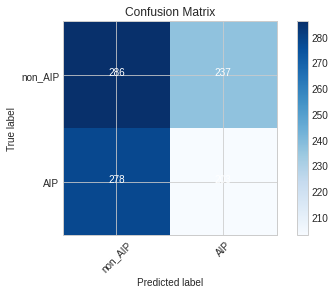

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)
cm_plot_labels = ['non_AIP','AIP']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Dense NN 2

In [ ]:
# Desne NN 2
model_NN2 = Sequential([
    Dense(units=500, input_shape=(153,),activation =tf.nn.relu),
    Dense(units=500,activation ='relu'),
    Dropout(0.40, name='dropout'),
    Dense(units=100,activation ='relu'),
    Dropout(0.40, name='dropout1'),
    Dense(units=50,activation ='relu'),
    Dropout(0.20, name='dropout4'),
    #Dense(units=20,activation ='relu'),
    Dense(units=2,activation ='softmax'),
])

In [ ]:
model_NN2 = tf.keras.models.Sequential([tf.keras.layers.Dense(120, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu),
                                    #tf.keras.layers.Dense(2000, activation=tf.nn.sigmoid),
                                    tf.keras.layers.Dense(2, activation=tf.nn.relu)])

In [ ]:
model_NN2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 500)               77000     
_________________________________________________________________
dense_84 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 100)               50100     
_________________________________________________________________
dropout1 (Dropout)           (None, 100)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout4 (Dropout)           (None, 50)              

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)#Adam(learning_rate=0.0001)
losses = tf.keras.losses.SparseCategoricalCrossentropy()#'sparse_categorical_crossentropy'

In [ ]:
model_NN2.compile(optimizer=opt, loss=losses, metrics=['accuracy'])

In [ ]:
model_NN2.fit(x=x_train_tf, y=y_train_n, validation_split=0.2, batch_size = 32, epochs=100, verbose=1)

Epoch 1/100
101/101 [==============================] - 1s 12ms/step - loss: 0.7010 - accuracy: 0.5093 - val_loss: 0.6916 - val_accuracy: 0.5124
Epoch 2/100
101/101 [==============================] - 1s 10ms/step - loss: 0.6950 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.4714
Epoch 3/100
101/101 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5305 - val_loss: 0.6910 - val_accuracy: 0.4913
Epoch 4/100
101/101 [==============================] - 1s 11ms/step - loss: 0.6927 - accuracy: 0.5224 - val_loss: 0.6909 - val_accuracy: 0.5124
Epoch 5/100
101/101 [==============================] - 1s 10ms/step - loss: 0.6918 - accuracy: 0.5196 - val_loss: 0.6905 - val_accuracy: 0.5211
Epoch 6/100
101/101 [==============================] - 1s 10ms/step - loss: 0.6922 - accuracy: 0.5143 - val_loss: 0.6917 - val_accuracy: 0.5124
Epoch 7/100
101/101 [==============================] - 1s 10ms/step - loss: 0.6898 - accuracy: 0.5012 - val_loss: 0.6901 - val_accuracy:

In [ ]:
predictions_NN2 = model_NN2.predict(
      x=x_test_tf
    , batch_size=10
    , verbose=0
) 

In [ ]:
rounded_predictions_NN2 = np.argmax(predictions_NN2, axis=-1)

Confusion matrix, without normalization
[[285 238]
 [255 226]]


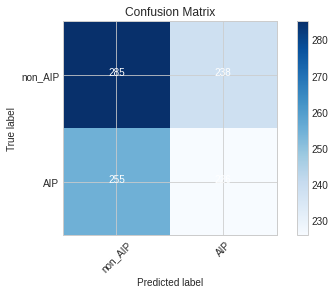

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions_NN2)
cm_plot_labels = ['non_AIP','AIP']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# LSTM Neural Network
lstm_model = Sequential(name = 'lstm_nn_model')
lstm_model.add(layer = Embedding(input_dim = 153, output_dim = 120, name = '1st_layer'))
lstm_model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2,activation='tanh', recurrent_activation='sigmoid', name = '2nd_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
lstm_model.add(layer = Dense(units = 50,  activation = 'relu', name = '4th_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
lstm_model.add(layer = Dense(units = 2,  activation = 'sigmoid', name = 'output_layer'))
# compiling the model
lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
lstm_model.summary()

Model: "lstm_nn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Embedding)        (None, None, 120)         18360     
_________________________________________________________________
2nd_layer (LSTM)             (None, 120)               115680    
_________________________________________________________________
3rd_layer (Dropout)          (None, 120)               0         
_________________________________________________________________
4th_layer (Dense)            (None, 50)                6050      
_________________________________________________________________
5th_layer (Dropout)          (None, 50)                0         
_________________________________________________________________
output_layer (Dense)         (None, 2)                 102       
Total params: 140,192
Trainable params: 140,192
Non-trainable params: 0
_______________________________________________

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)#Adam(learning_rate=0.0001)
losses = tf.keras.losses.SparseCategoricalCrossentropy()#'sparse_categorical_crossentropy'

In [ ]:
model_NN2.compile(optimizer=opt, loss=losses, metrics=['accuracy'])

In [ ]:
model_NN2.fit(x=x_train_tf, y=y_train_n, validation_split=0.2, batch_size = 32, epochs=100, verbose=1)

Epoch 1/100
101/101 [==============================] - 1s 10ms/step - loss: 0.6593 - accuracy: 0.5644 - val_loss: 1.0000 - val_accuracy: 0.5062
Epoch 2/100
101/101 [==============================] - 1s 8ms/step - loss: 0.6574 - accuracy: 0.5759 - val_loss: 0.8373 - val_accuracy: 0.5211
Epoch 3/100
101/101 [==============================] - 1s 9ms/step - loss: 0.6617 - accuracy: 0.5657 - val_loss: 0.8276 - val_accuracy: 0.5249
Epoch 4/100
101/101 [==============================] - 1s 8ms/step - loss: 0.6539 - accuracy: 0.5737 - val_loss: 1.0174 - val_accuracy: 0.5323
Epoch 5/100
101/101 [==============================] - 1s 9ms/step - loss: 0.6550 - accuracy: 0.5657 - val_loss: 0.8368 - val_accuracy: 0.5261
Epoch 6/100
101/101 [==============================] - 1s 8ms/step - loss: 0.6546 - accuracy: 0.5725 - val_loss: 0.8648 - val_accuracy: 0.5211
Epoch 7/100
101/101 [==============================] - 1s 8ms/step - loss: 0.6500 - accuracy: 0.5803 - val_loss: 0.8491 - val_accuracy: 0.531

In [ ]:
predictions_NN2 = model_NN2.predict(
      x=x_test_tf
    , batch_size=10
    , verbose=0
) 

In [ ]:
rounded_predictions_NN2 = np.argmax(predictions_NN2, axis=-1)

Confusion matrix, without normalization
[[381 142]
 [347 134]]


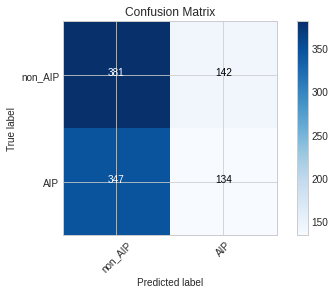

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions_NN2)
cm_plot_labels = ['non_AIP','AIP']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#@title
